<div style="background-image:url(instaseis_images/meschede-seismic-waves.png); padding: 10px 30px 20px 30px; background-size:cover; background-opacity:50%; border-radius:5px; background-position: 0px -200px">
<p style="float:right; margin-top:20px; padding: 20px 60px 0px 10px; background:rgba(255,255,255,0.75); border-radius:10px;">
<img width="400px" src=instaseis_images/logo.png>
</p>

<h1 style="color:#BBB; padding-bottom: 10px">Instaseis Tutorial</h1>
<h2 style="color:#BBB; padding-bottom: 60px">Part 2: First Basic Exercise</h2>

</div>

## First Basic Exercise

**Task:** Calculate three component synthetic seismograms for the stations and events in the **data/events** and **data/stations** subdirectories and save them on disc.

#### Notes

1. Receiver objects can also be created from StationXML, SEED, or STATIONS files as well as obpy inventories using `instaseis.Receiver.parse()`; see the [documentation](http://www.instaseis.net/source.html#receiver) for details.
2. Source objects can also be created from QuakeML, CMTSOLUTIONS, and in other ways using `instaseis.Source.parse()`; see the [documentation](http://www.instaseis.net/source.html#source) for details.
3. The `get_seismograms()` method has a couple of extra arguments:
  * `kind`: `displacement`, `velocity`, `acceleration`
  * `remove_source_shift`, `reconvolve_stf`, `dt`,
  
  ... see the [documentation](http://www.instaseis.net/instaseis.html#instaseis.base_instaseis_db.BaseInstaseisDB.get_seismograms) for details.
4. You can use the properties of the Receiver and Source objects to create usefull filenames.

-----

Basic lines to set up the notebook and some paths.

In [1]:
%matplotlib inline
from __future__ import print_function
import matplotlib.pyplot as plt
import numpy as np
import os
import obspy
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (10, 8)

Import Instaseis and open the database:

In [2]:
import instaseis
db = instaseis.open_db("data/database")

-----

### 1. Load Receivers

**reminder:** you can use ObsPy to load stations and plot a map:

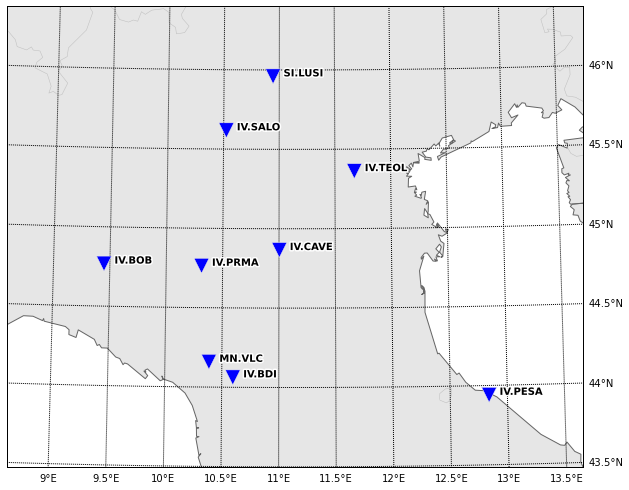

In [11]:
from obspy import read_inventory

inventory = read_inventory('data/stations/all_stations.xml')
inventory.plot(projection="local", resolution="i");

This inventory can directly be used as input to generate a list of `instaseis.Receiver` objects:

In [4]:
receivers = instaseis.Receiver.parse(inventory)
for rec in receivers[:2]:
    print(rec)

Instaseis Receiver:
	longitude :   10.6 deg
	latitude  :   43.9 deg
	network   : IV
	station   : BDI
	location  : 

Instaseis Receiver:
	longitude :    9.4 deg
	latitude  :   44.6 deg
	network   : IV
	station   : BOB
	location  : 



**Alternatively**, instaseis can directly open the station xml or STATIONS file (but then you don't have the nice plot):

In [5]:
receivers = instaseis.Receiver.parse('data/stations/all_stations.xml')
print(receivers[0])
receivers = instaseis.Receiver.parse('data/stations/STATIONS')
print(receivers[0])

Instaseis Receiver:
	longitude :   10.6 deg
	latitude  :   43.9 deg
	network   : IV
	station   : BDI
	location  : 

Instaseis Receiver:
	longitude :   10.6 deg
	latitude  :   43.9 deg
	network   : IV
	station   : BDI
	location  : 



### 2. Load Events
**reminder:** use ObsPy to load events from a QuakeML file containing all events and plot a map:

6 Event(s) in Catalog:
2014-04-04T01:37:57.900000Z | -20.610,  -70.910 | 6.2 Mwc
2015-05-12T07:05:28.500000Z | +27.560,  +86.100 | 7.2 Mwc
2015-04-25T06:11:58.400000Z | +27.770,  +85.370 | 7.9 Mwc
2012-05-29T07:00:02.880000Z | +44.842,  +11.066 | 5.6 Mw | manual
2015-01-23T06:51:20.340000Z | +44.127,  +11.121 | 4.3 Mw | manual
2014-04-01T23:47:31.500000Z | -19.700,  -70.810 | 8.1 Mwc
Instaseis Source:
	origin time      : 2014-04-04T01:37:57.900000Z
	Longitude        :  -70.9 deg
	Latitude         :  -20.5 deg
	Depth            : 2.0e+01 km
	Moment Magnitude :   6.29
	Scalar Moment    :   2.74e+18 Nm
	Mrr              :   1.94e+18 Nm
	Mtt              :   7.80e+16 Nm
	Mpp              :  -2.02e+18 Nm
	Mrt              :   7.78e+17 Nm
	Mrp              :  -1.69e+18 Nm
	Mtp              :   3.76e+17 Nm



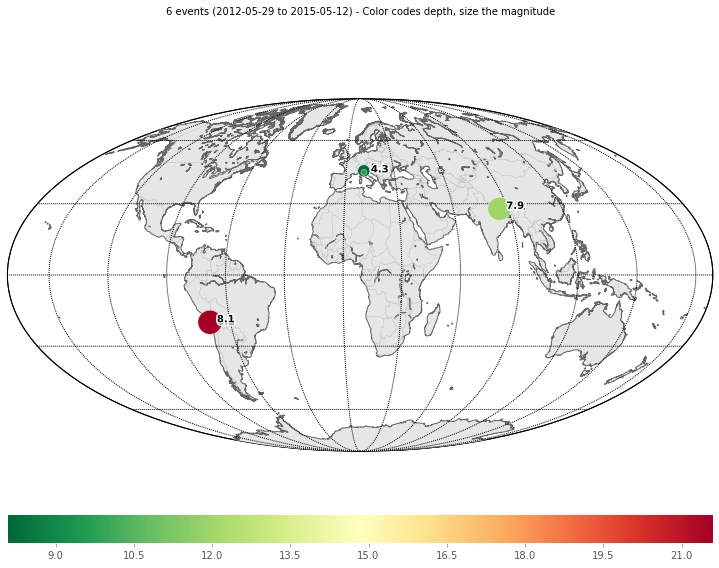

In [6]:
import glob # provides iterator to loop over files

cat = obspy.core.event.Catalog()

for filename in glob.iglob('data/events/quakeml/*.xml'):
     cat += obspy.readEvents(filename)
        
print(cat)
print(instaseis.Source.parse(cat.events[0]))
cat.plot();

**Alternatively** load QuakeML or CMTSOLUTION files directly using `instaseis.Source.parse()` and store the sources in a list:

In [7]:
sources = []

for filename in glob.iglob('data/events/quakeml/*.xml'):
    sources.append(instaseis.Source.parse(filename))
    
print(sources[0])

for filename in glob.iglob('data/events/cmtsolutions/*'):
    sources.append(instaseis.Source.parse(filename))

print(sources[0])

Instaseis Source:
	origin time      : 2014-04-04T01:37:57.900000Z
	Longitude        :  -70.9 deg
	Latitude         :  -20.5 deg
	Depth            : 2.0e+01 km
	Moment Magnitude :   6.29
	Scalar Moment    :   2.74e+18 Nm
	Mrr              :   1.94e+18 Nm
	Mtt              :   7.80e+16 Nm
	Mpp              :  -2.02e+18 Nm
	Mrt              :   7.78e+17 Nm
	Mrp              :  -1.69e+18 Nm
	Mtp              :   3.76e+17 Nm

Instaseis Source:
	origin time      : 2014-04-04T01:37:57.900000Z
	Longitude        :  -70.9 deg
	Latitude         :  -20.5 deg
	Depth            : 2.0e+01 km
	Moment Magnitude :   6.29
	Scalar Moment    :   2.74e+18 Nm
	Mrr              :   1.94e+18 Nm
	Mtt              :   7.80e+16 Nm
	Mpp              :  -2.02e+18 Nm
	Mrt              :   7.78e+17 Nm
	Mrp              :  -1.69e+18 Nm
	Mtp              :   3.76e+17 Nm



### 3. Extract Seismograms and Save to File

For the first solution using a ObsPy event catalog:

In [8]:
dt = 1.0

for event in cat:
    src = instaseis.Source.parse(event)
    srcname = '%s_Mw_%3.1f' % (src.origin_time.date, src.moment_magnitude)
    for rec in receivers:
        # create a usefull filename
        recname = '%s_%s' % (rec.network, rec.station)
        filename = '%s_%s' % (recname, srcname)
        filename = filename.replace('.', '_')
        
        # extract seismograms using instaseis
        st = db.get_seismograms(source=src, receiver=rec, dt=dt)
        
        # write to miniseed files in the data_out folder. Write as MiniSEED due to multi
        # component support.
        st.write(os.path.join('data_out', filename + '.mseed'), format='mseed')

For the second solution use a list of sources:

In [9]:
dt = 1.0

for src in sources:
    srcname = '%s_Mw_%3.1f' % (src.origin_time.date, src.moment_magnitude)
    for rec in receivers:
        # create a usefull filename
        recname = '%s_%s' % (rec.network, rec.station)
        filename = '%s_%s' % (recname, srcname)
        filename = filename.replace('.', '_')
        
        # extract seismograms using instaseis
        st = db.get_seismograms(source=src, receiver=rec, dt=dt)
        
        # write to miniseed files in the data_out folder. Write as MiniSEED due to multi
        # component support.
        st.write(os.path.join('data_out', filename + '.mseed'), format='mseed')

Check the data:

In [10]:
ls data_out/

dummy                            IV_PRMA_2015-01-23_Mw_4_3.mseed
IV_BDI_2012-05-29_Mw_5_7.mseed   IV_PRMA_2015-04-25_Mw_7_9.mseed
IV_BDI_2014-04-01_Mw_8_2.mseed   IV_PRMA_2015-05-12_Mw_7_3.mseed
IV_BDI_2014-04-04_Mw_6_3.mseed   IV_SALO_2012-05-29_Mw_5_7.mseed
IV_BDI_2015-01-23_Mw_4_3.mseed   IV_SALO_2014-04-01_Mw_8_2.mseed
IV_BDI_2015-04-25_Mw_7_9.mseed   IV_SALO_2014-04-04_Mw_6_3.mseed
IV_BDI_2015-05-12_Mw_7_3.mseed   IV_SALO_2015-01-23_Mw_4_3.mseed
IV_BOB_2012-05-29_Mw_5_7.mseed   IV_SALO_2015-04-25_Mw_7_9.mseed
IV_BOB_2014-04-01_Mw_8_2.mseed   IV_SALO_2015-05-12_Mw_7_3.mseed
IV_BOB_2014-04-04_Mw_6_3.mseed   IV_TEOL_2012-05-29_Mw_5_7.mseed
IV_BOB_2015-01-23_Mw_4_3.mseed   IV_TEOL_2014-04-01_Mw_8_2.mseed
IV_BOB_2015-04-25_Mw_7_9.mseed   IV_TEOL_2014-04-04_Mw_6_3.mseed
IV_BOB_2015-05-12_Mw_7_3.mseed   IV_TEOL_2015-01-23_Mw_4_3.mseed
IV_CAVE_2012-05-29_Mw_5_7.mseed  IV_TEOL_2015-04-25_Mw_7_9.mseed
IV_CAVE_2014-04-01_Mw_8_2.mseed  IV_TEOL_2015-05-12_Mw_7_3.mseed
IV_CAVE_2014-04-04_Mw_6_3

### Acknowledgements

Background picture at the very top is from Matthias Meschede.